<a href="https://colab.research.google.com/github/ericblancovid/C-Users-blanc-Documents-MT5_Trade_Connector/blob/master/Coca_cola_stock_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# this program predicts the price of a stock for a specific day
# using machine learning


In [24]:
#import libraries sklearn numpy pandas matplotlib
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
#load data
from google.colab import files
files.upload()

Saving ko_price-history.csv to ko_price-history (1).csv


{'ko_price-history.csv': b'Date,Open,High,Low,Close,Change,%Chg,Volume\r\n01/29/2021,48.85,49.12,48.11,48.15,-1,-2.03%,18670200\r\n01/28/2021,48.69,49.5,48.61,49.15,0.62,+1.28%,17498800\r\n01/27/2021,48.89,49.32,48.23,48.53,-0.76,-1.54%,21242400\r\n01/26/2021,48.91,49.4,48.61,49.29,0.51,+1.05%,12922600\r\n01/25/2021,48.42,48.84,48.24,48.78,0.29,+0.60%,16604200\r\n01/22/2021,48.81,48.94,48.49,48.49,-0.46,-0.94%,15400300\r\n01/21/2021,48.78,49.09,48.46,48.95,0.27,+0.55%,19707100\r\n01/20/2021,48.54,48.82,48.31,48.68,0.17,+0.35%,23115700\r\n01/19/2021,48.74,49.04,48.24,48.51,-0.19,-0.39%,29114400\r\n01/15/2021,49.155,49.1799,48.53,48.7,-0.53,-1.08%,24366700\r\n01/14/2021,50.16,50.18,49.22,49.23,-0.93,-1.85%,34303500\r\n01/13/2021,49.98,50.36,49.9533,50.16,0.05,+0.10%,18864100\r\n01/12/2021,50.04,50.3684,49.76,50.11,-0.09,-0.18%,18538600\r\n01/11/2021,50.62,50.86,49.95,50.2,-0.88,-1.72%,19310500\r\n01/08/2021,50.03,51.125,49.84,51.08,1.12,+2.24%,29673900\r\n01/07/2021,50.09,50.255,49.52,49

In [70]:
#store the data f price history
df = pd.read_csv('ko_price-history.csv')
df


,Date,Open,High,Low,Close,Change,%Chg,Volume
0,01/29/2021,48.85,49.1200,48.110,48.15,-1.00,-2.03%,18670200
1,01/28/2021,48.69,49.5000,48.610,49.15,0.62,+1.28%,17498800
2,01/27/2021,48.89,49.3200,48.230,48.53,-0.76,-1.54%,21242400
3,01/26/2021,48.91,49.4000,48.610,49.29,0.51,+1.05%,12922600
4,01/25/2021,48.42,48.8400,48.240,48.78,0.29,+0.60%,16604200
...,...,...,...,...,...,...,...,...
59,11/03/2020,49.22,49.9600,49.000,49.35,0.73,+1.50%,15285000
60,11/02/2020,48.75,48.9500,48.240,48.62,0.56,+1.17%,15156100
61,10/30/2020,47.81,48.1216,47.365,48.06,0.04,+0.08%,15805000
62,10/29/2020,47.73,48.4750,47.300,48.02,0.06,+0.13%,15369800


In [71]:
#show and store the last of row of data 
actual_price = df.tail(1)
#show the data 
actual_price

,Date,Open,High,Low,Close,Change,%Chg,Volume
63,10/28/2020,49.0,49.15,47.78,47.96,-1.94,-3.89%,19886100


In [72]:
# get all of the data except the last row
df = df.head(len(df)-1)
#show data set
df

,Date,Open,High,Low,Close,Change,%Chg,Volume
0,01/29/2021,48.85,49.1200,48.110,48.15,-1.00,-2.03%,18670200
1,01/28/2021,48.69,49.5000,48.610,49.15,0.62,+1.28%,17498800
2,01/27/2021,48.89,49.3200,48.230,48.53,-0.76,-1.54%,21242400
3,01/26/2021,48.91,49.4000,48.610,49.29,0.51,+1.05%,12922600
4,01/25/2021,48.42,48.8400,48.240,48.78,0.29,+0.60%,16604200
...,...,...,...,...,...,...,...,...
58,11/04/2020,49.43,50.2100,49.080,49.17,-0.18,-0.36%,12930800
59,11/03/2020,49.22,49.9600,49.000,49.35,0.73,+1.50%,15285000
60,11/02/2020,48.75,48.9500,48.240,48.62,0.56,+1.17%,15156100
61,10/30/2020,47.81,48.1216,47.365,48.06,0.04,+0.08%,15805000


In [73]:
#create empty lists
days = list()
adj_close_prices = list()

In [74]:
#get only date andadjusted closed prices.
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']

In [75]:
#creat indipendent data set(dates)
for day in df_days:
  days.append([int(day.split('/')[1])])

In [76]:
#create the dependent data set adj close price
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [77]:
#show the days
days

[[29],
 [28],
 [27],
 [26],
 [25],
 [22],
 [21],
 [20],
 [19],
 [15],
 [14],
 [13],
 [12],
 [11],
 [8],
 [7],
 [6],
 [5],
 [4],
 [31],
 [30],
 [29],
 [28],
 [24],
 [23],
 [22],
 [21],
 [18],
 [17],
 [16],
 [15],
 [14],
 [11],
 [10],
 [9],
 [8],
 [7],
 [4],
 [3],
 [2],
 [1],
 [30],
 [27],
 [25],
 [24],
 [23],
 [20],
 [19],
 [18],
 [17],
 [16],
 [13],
 [12],
 [11],
 [10],
 [9],
 [6],
 [5],
 [4],
 [3],
 [2],
 [30],
 [29]]

In [78]:
#show djusted closed
adj_close_prices

[48.15,
 49.15,
 48.53,
 49.29,
 48.78,
 48.49,
 48.95,
 48.68,
 48.51,
 48.7,
 49.23,
 50.16,
 50.11,
 50.2,
 51.08,
 49.96,
 50.52,
 52.18,
 52.76,
 54.84,
 54.44,
 54.13,
 54.16,
 53.44,
 53.08,
 52.76,
 52.81,
 53.74,
 53.27,
 53.06,
 53.84,
 53.27,
 53.35,
 53.05,
 53.33,
 53.18,
 52.99,
 53.85,
 52.78,
 52.11,
 52.04,
 51.6,
 52.7,
 52.93,
 53.22,
 52.68,
 52.67,
 53.13,
 52.61,
 53.68,
 53.85,
 53.45,
 53.01,
 53.58,
 53.98,
 52.57,
 49.45,
 49.44,
 49.17,
 49.35,
 48.62,
 48.06,
 48.02]

In [79]:
#create 3 models
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C= 1000.0, degree= 2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C= 1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)



SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

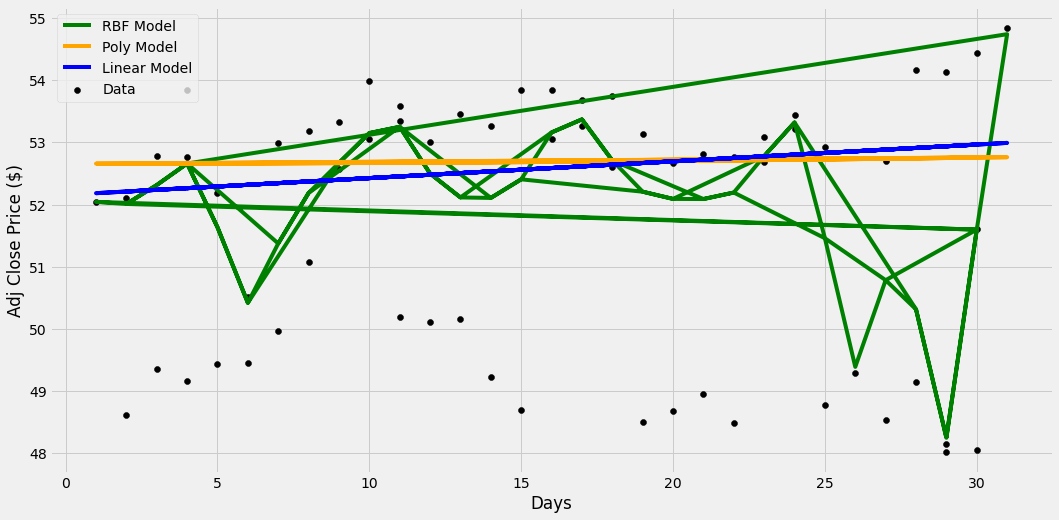

In [81]:
#Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Poly Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()



In [82]:
#Show the predicted price for the given day
day = [[30]]
print('The RBF SVR predict price:', rbf_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))
print('The Polynomial SVR predicted price:', poly_svr.predict(day))

The RBF SVR predict price: [51.5971987]
The Linear SVR predicted price: [52.96478261]
The Polynomial SVR predicted price: [52.7551435]


In [89]:
print(actual_price)

          Date  Open   High    Low  Close  Change    %Chg    Volume
63  10/28/2020  49.0  49.15  47.78  47.96   -1.94  -3.89%  19886100
